# Assignment2 - Supervised Learning flow

# Part 1 - Student details:
* Please write the First Name and last 4 digits of the i.d. for each student. For example:
<pre>Israel 9812</pre>

In [1]:
# student 1: Guy Sean Eden 3456
# student 2: Orel Arussi 9629
# student 3: Daniel Ladiginsky 9421

## Part 2 - Initial Preparations 
You could add as many code cells as needed

In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import make_scorer, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score, confusion_matrix

In [9]:
train_csv = "wine_train.csv"
test_csv = "wine_test.csv"

train_path = f".{os.sep}{train_csv}"
test_path = f".{os.sep}{test_csv}"

train_data = pd.read_csv(train_path)
test_data = pd.read_csv(test_path)

In [10]:
train_data.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,12.08,1.83,2.32,18.5,81.0,1.60,1.50,0.52,1.64,2.40,1.08,2.27,480.0,1
1,13.58,2.58,2.69,24.5,105.0,1.55,0.84,0.39,1.54,8.66,0.74,1.80,750.0,2
2,12.37,0.94,1.36,10.6,88.0,1.98,0.57,0.28,0.42,1.95,1.05,1.82,520.0,1
3,11.82,1.72,1.88,19.5,86.0,2.50,1.64,0.37,1.42,2.06,0.94,2.44,415.0,1
4,13.16,3.57,2.15,21.0,102.0,1.50,0.55,0.43,1.30,4.00,0.60,1.68,830.0,2


In [8]:
test_data.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,13.78,2.76,2.30,22.0,90.0,1.35,0.68,0.41,1.03,9.58,0.70,1.68,615.0,2
1,14.02,1.68,2.21,16.0,96.0,2.65,2.33,0.26,1.98,4.70,1.04,3.59,1035.0,0
2,13.17,5.19,2.32,22.0,93.0,1.74,0.63,0.61,1.55,7.90,0.60,1.48,725.0,2
3,11.03,1.51,2.20,21.5,85.0,2.46,2.17,0.52,2.01,1.90,1.71,2.87,407.0,1
4,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2


In [12]:
numeric_summary_df = pd.DataFrame(train_data.describe())
numeric_summary_df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000
mean,12.997254,2.297746,2.361690,19.419718,99.943662,2.315986,2.063592,0.346690,1.561901,5.030211,0.958563,2.638873,742.457746,0.922535
std,0.789931,1.093317,0.283231,3.354815,13.683751,0.639469,1.005302,0.117562,0.540979,2.239593,0.219631,0.718083,317.250905,0.772524
min,11.410000,0.740000,1.360000,10.600000,78.000000,0.980000,0.340000,0.130000,0.420000,1.280000,0.480000,1.290000,278.000000,0.000000
25%,12.370000,1.592500,2.222500,17.250000,88.000000,1.782500,1.257500,0.260000,1.250000,3.180000,0.800000,1.922500,500.000000,0.000000
50%,13.050000,1.865000,2.360000,19.250000,98.000000,2.380000,2.155000,0.320000,1.505000,4.800000,0.960000,2.815000,660.000000,1.000000
75%,13.637500,3.020000,2.557500,21.375000,108.000000,2.822500,2.887500,0.430000,1.870000,6.182500,1.120000,3.197500,957.500000,2.000000
max,14.750000,5.650000,3.230000,30.000000,151.000000,3.880000,5.080000,0.630000,3.580000,11.750000,1.450000,4.000000,1680.000000,2.000000


In [15]:
class_distribution = train_data['target'].value_counts()
class_distribution_df = pd.DataFrame(train_data['target'].value_counts())
print("Class Distribution:")
class_distribution_df

Class Distribution:


,count
target,
1,57
0,48
2,37


In [42]:
corr =  train_data.corr()
corr_df = pd.DataFrame(corr)



<Axes: >

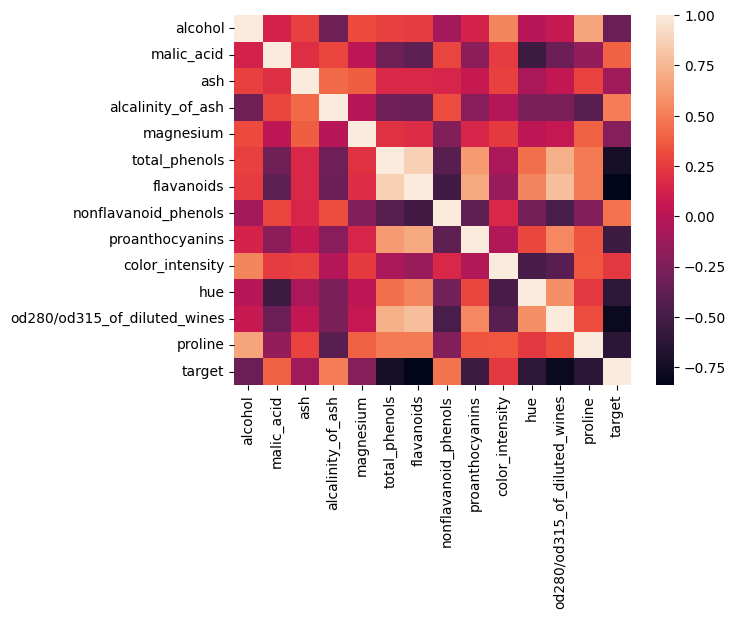

In [41]:
sns.heatmap(corr, 
         xticklabels=corr.columns, 
         yticklabels=corr.columns)

In [25]:
def cross_tabulation(df, col_name, other_col_name):
    #crosstab
    return pd.crosstab(df[col_name],df[other_col_name],normalize="index")

def plot_cross_tabulation(df, col_names, other_col_name):
    c = col_names.copy()
    figs, axes= plt.subplots(len(c))
    j=0
    for i in c:
        df_cross = cross_tabulation(df,i,other_col_name)
        df_cross.plot(kind='line',ax=axes[j])
        j=j+1

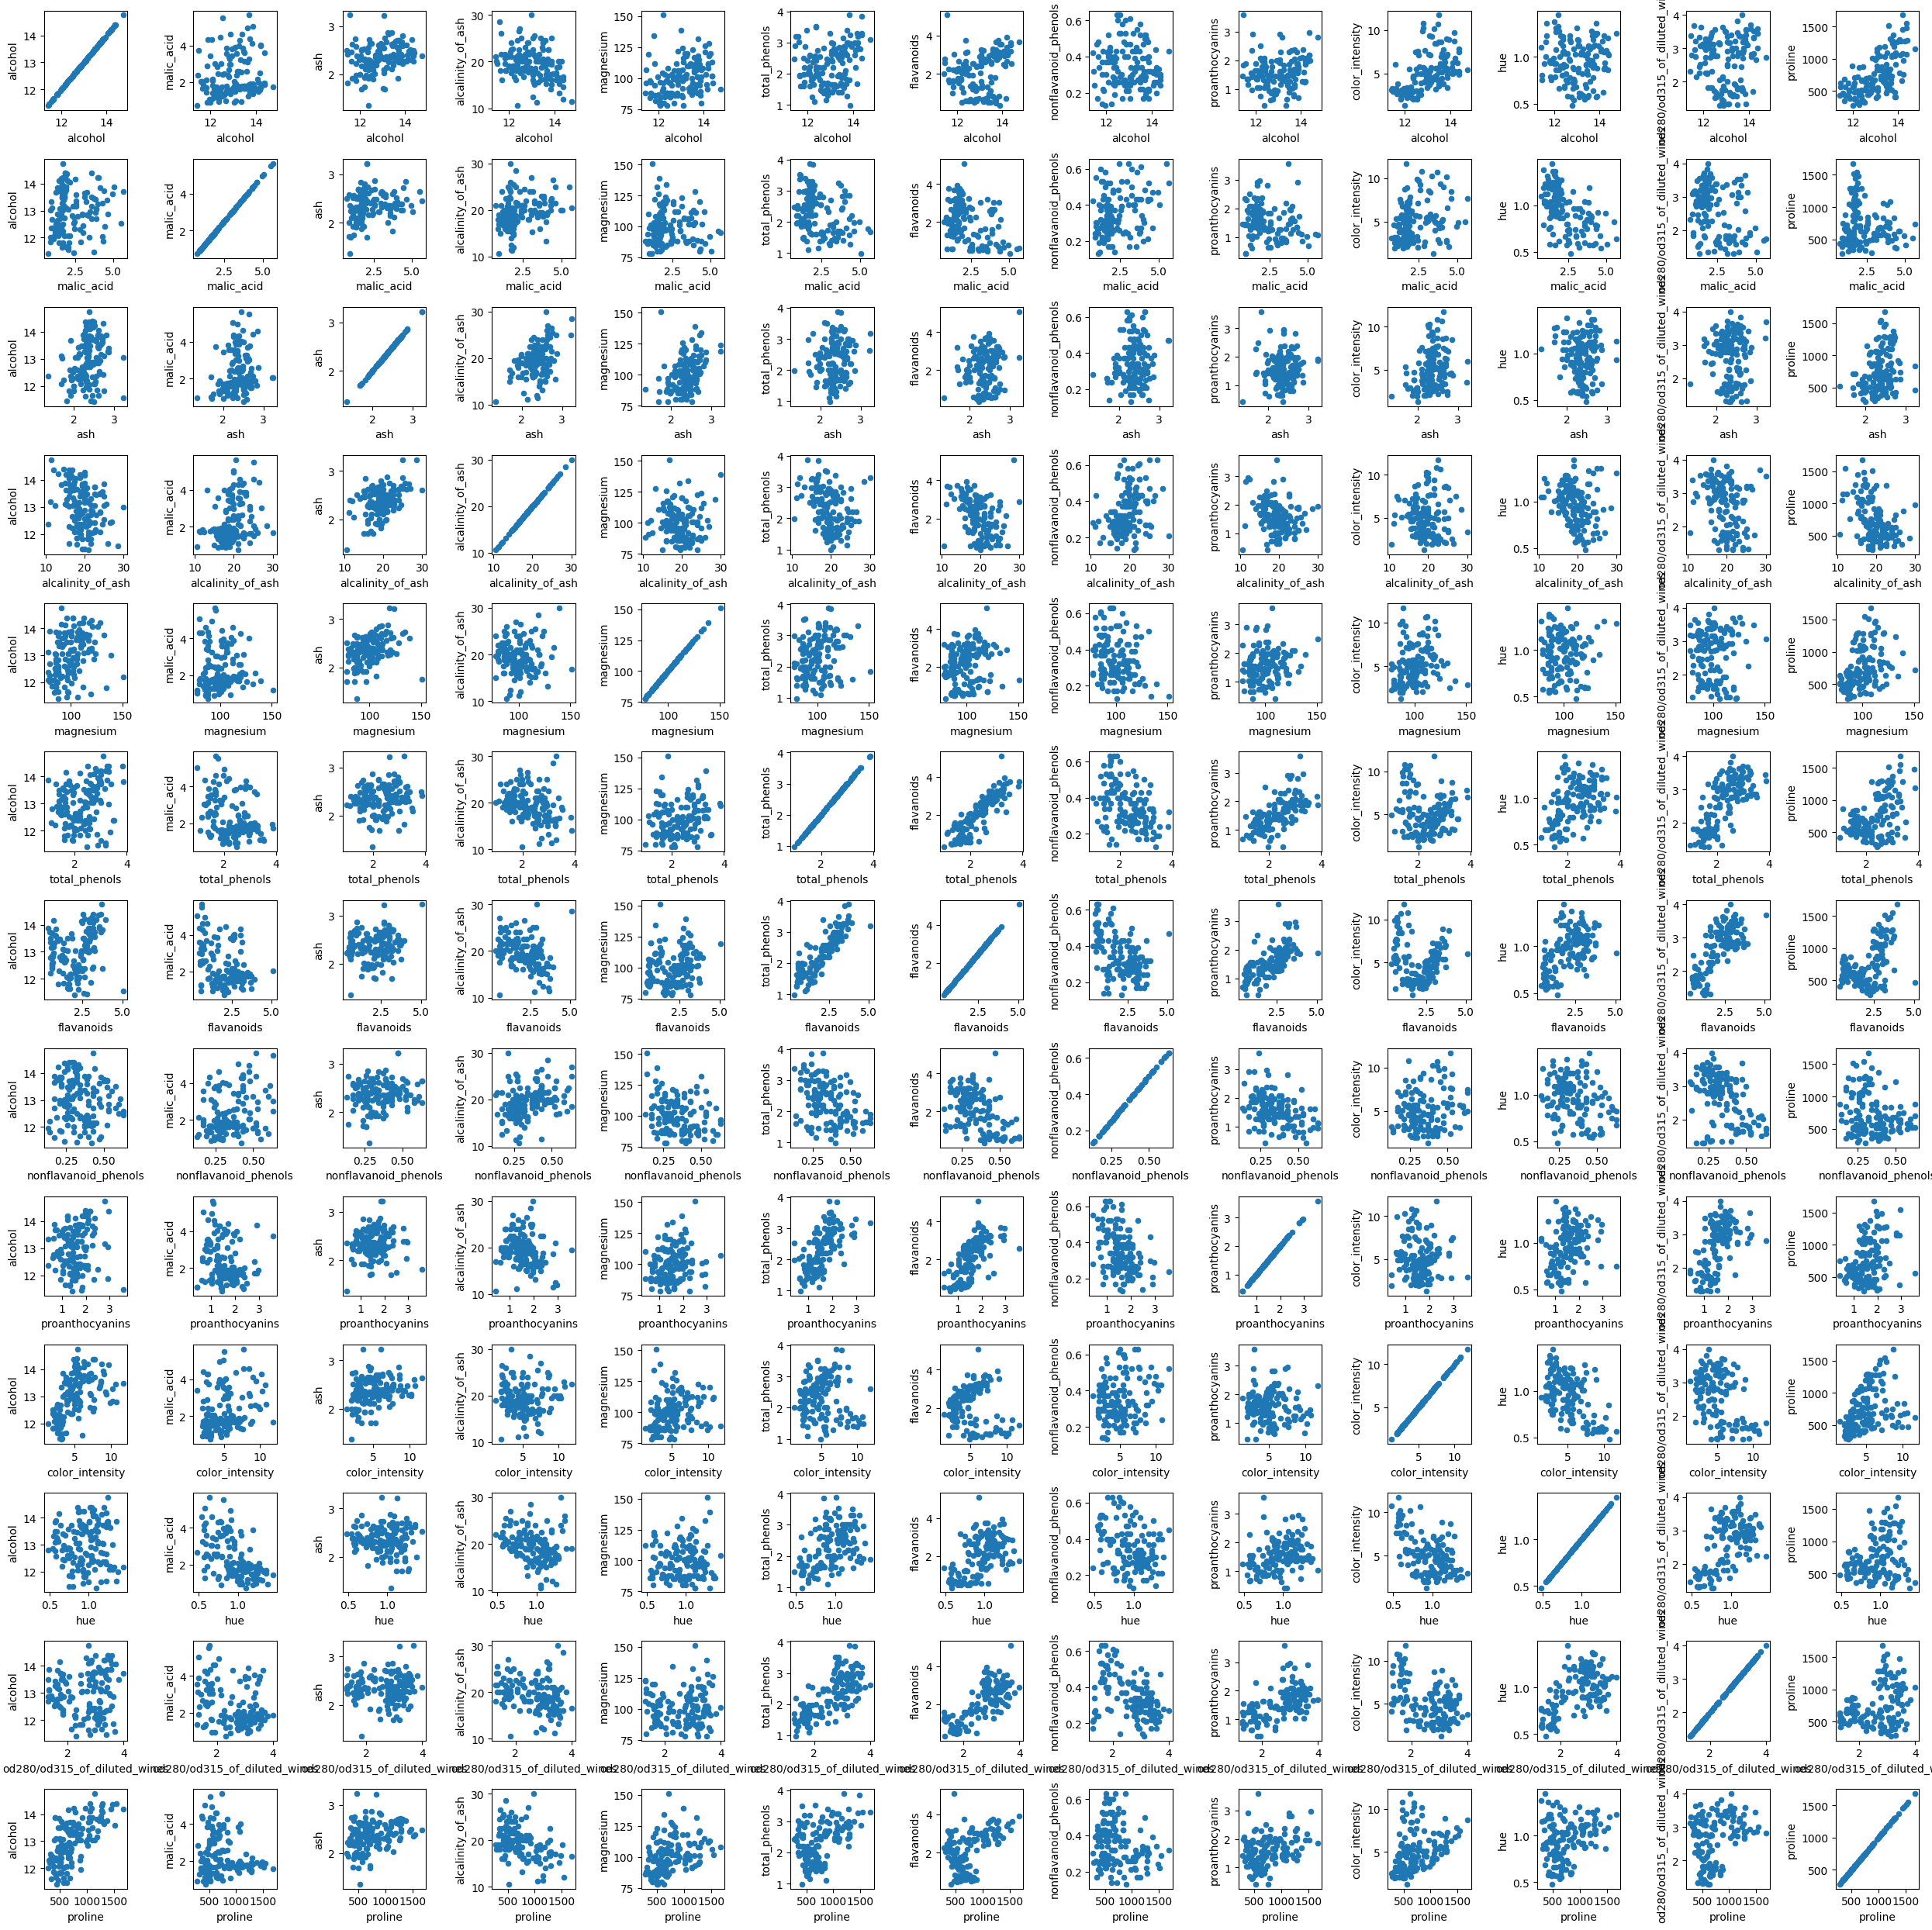

In [39]:
column_names = list(train_data)[:13]
fig, axes = plt.subplots(13, 13, figsize=(25, 25))
for i, attr1 in enumerate(column_names):
    for j, attr2 in enumerate(column_names):
        train_data.plot.scatter(x=attr1, y=attr2, ax=axes[i][j])
plt.tight_layout()
plt.show()

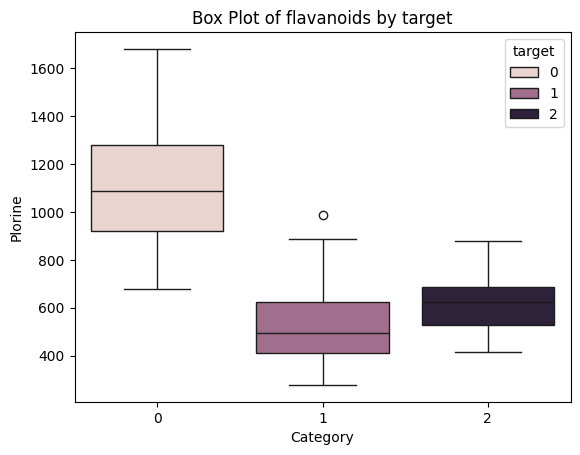

In [48]:
sns.boxplot(x='target', y='proline', data=train_data, hue='target')
plt.title('Box Plot of flavanoids by target')
plt.xlabel('Category')
plt.ylabel('Plorine')
plt.show()

## Part 3 - Experiments
You could add as many code cells as needed

In [89]:
X_train = train_data.drop(columns=['target']) 
y_train = train_data['target']

# Initialize 5fold cross validation
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Create F1 scorer with macro average
f1_macro = make_scorer(f1_score, average='macro')

In [108]:
# Models and their hyperparameter grids, including scaling options
param_grids = {
    'KNN': {
        'model': Pipeline([
            ('scaler', StandardScaler()),
            ('knn', KNeighborsClassifier())
        ]),
        'params': {
            'scaler': [StandardScaler(), MinMaxScaler()],  # Testing both scaling methods
            'knn__n_neighbors': [3, 5, 7, 9, 11]
        }
    },
    'Naive Bayes': {
        'model': Pipeline([
            ('scaler', StandardScaler()),
            ('nb', GaussianNB())
        ]),
        'params': {
            'scaler': [StandardScaler(), MinMaxScaler()]  # Testing both scaling methods
        }
    },
    'Decision Tree': {
        'model': Pipeline([
            ('scaler', StandardScaler()),
            ('dtc', DecisionTreeClassifier(random_state=42))
        ]),
        'params': {
            'scaler': [None, StandardScaler(), MinMaxScaler()],  # Option to skip scaling
            'dtc__max_depth': [3, 5, 7, 10],
            'dtc__min_samples_split': [2, 5, 10]
        }
    }
}


In [117]:
def perform_grid_search(model, param_grid, X, y):
    grid_search = GridSearchCV(model, param_grid, cv=kf, scoring=f1_macro, return_train_score=False)
    grid_search.fit(X, y)
    return grid_search.best_estimator_, grid_search.best_score_, grid_search.cv_results_, grid_search.best_params_

In [119]:
# Store results
best_models = {}
results = {}
cv_scores = {} 
best_params = {}

# find best hyperparameters by cross validation for each model
for model_name, model_info in param_grids.items():
    print(f"\nEvaluating {model_name}...")
    best_model, best_score, cv_result, params = perform_grid_search(
        model_info['model'], model_info['params'], X_train, y_train)
    
    best_models[model_name] = best_model
    best_params[model_name] = params
    results[model_name] = best_score
    cv_scores[model_name] = cv_result['split0_test_score'], cv_result['split1_test_score'], cv_result['split2_test_score'], cv_result['split3_test_score'], cv_result['split4_test_score']
    
    print(f"Best {model_name} Hyperparameters: {best_model.get_params()}")
    print(f"Best {model_name} Mean Macro F1 Score (CV): {best_score}")


Evaluating KNN...
Best KNN Hyperparameters: {'memory': None, 'steps': [('scaler', StandardScaler()), ('knn', KNeighborsClassifier(n_neighbors=3))], 'verbose': False, 'scaler': StandardScaler(), 'knn': KNeighborsClassifier(n_neighbors=3), 'scaler__copy': True, 'scaler__with_mean': True, 'scaler__with_std': True, 'knn__algorithm': 'auto', 'knn__leaf_size': 30, 'knn__metric': 'minkowski', 'knn__metric_params': None, 'knn__n_jobs': None, 'knn__n_neighbors': 3, 'knn__p': 2, 'knn__weights': 'uniform'}
Best KNN Mean Macro F1 Score (CV): 0.9584848484848486

Evaluating Naive Bayes...
Best Naive Bayes Hyperparameters: {'memory': None, 'steps': [('scaler', StandardScaler()), ('nb', GaussianNB())], 'verbose': False, 'scaler': StandardScaler(), 'nb': GaussianNB(), 'scaler__copy': True, 'scaler__with_mean': True, 'scaler__with_std': True, 'nb__priors': None, 'nb__var_smoothing': 1e-09}
Best Naive Bayes Mean Macro F1 Score (CV): 0.9730625583566759

Evaluating Decision Tree...
Best Decision Tree Hype

In [120]:
X_test = test_data.drop(columns=['target'])
y_test = test_data['target']

for model_name, model in best_models.items():
    y_pred = model.predict(X_test)
    test_f1 = f1_score(y_test, y_pred, average='macro')
    print(f"{model_name} Test Macro F1 Score: {test_f1}")

KNN Test Macro F1 Score: 0.9453734671125975
Naive Bayes Test Macro F1 Score: 1.0
Decision Tree Test Macro F1 Score: 0.9155844155844156


In [123]:
# Prepare a DataFrame for visualization
# Create a comparison DataFrame
comparison_df = pd.DataFrame({
    'Model': list(results.keys()),
    'Best Macro F1 Score (CV)': list(results.values()),
    'Best Parameters': [best_params[model] for model in results.keys()]
})

# Show the comparison DataFrame
print("\nModel Comparison DataFrame:")
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.max_colwidth', None)  # Show full column content
pd.set_option('display.expand_frame_repr', False)  # Avoid wrapping to multiple lines
comparison_df



Model Comparison DataFrame:


,Model,Best Macro F1 Score (CV),Best Parameters
0,KNN,0.958485,"{'knn__n_neighbors': 3, 'scaler': StandardScaler()}"
1,Naive Bayes,0.973063,{'scaler': StandardScaler()}
2,Decision Tree,0.887269,"{'dtc__max_depth': 5, 'dtc__min_samples_split': 10, 'scaler': None}"


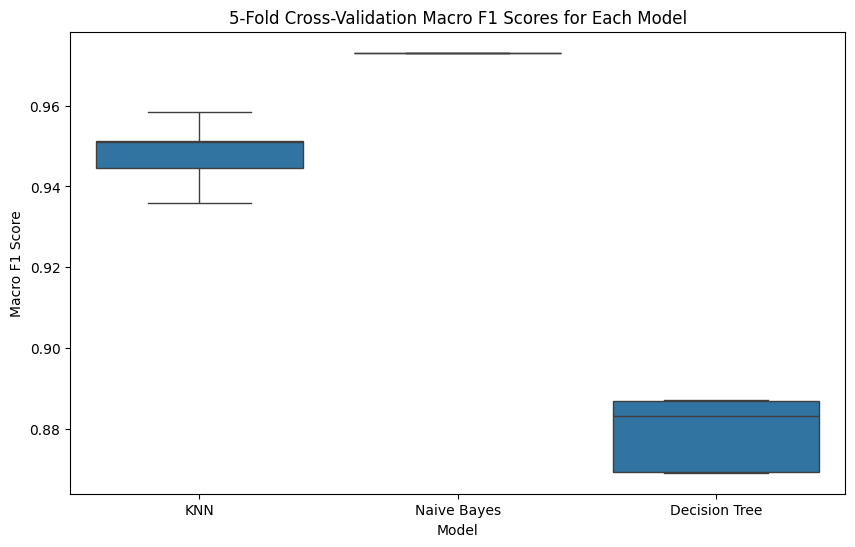

In [124]:
# Create boxplot to visualize cross-validation scores
plt.figure(figsize=(10, 6))
sns.boxplot(x='Model', y='Macro F1 Score', data=cv_df)
plt.title('5-Fold Cross-Validation Macro F1 Scores for Each Model')
plt.show()

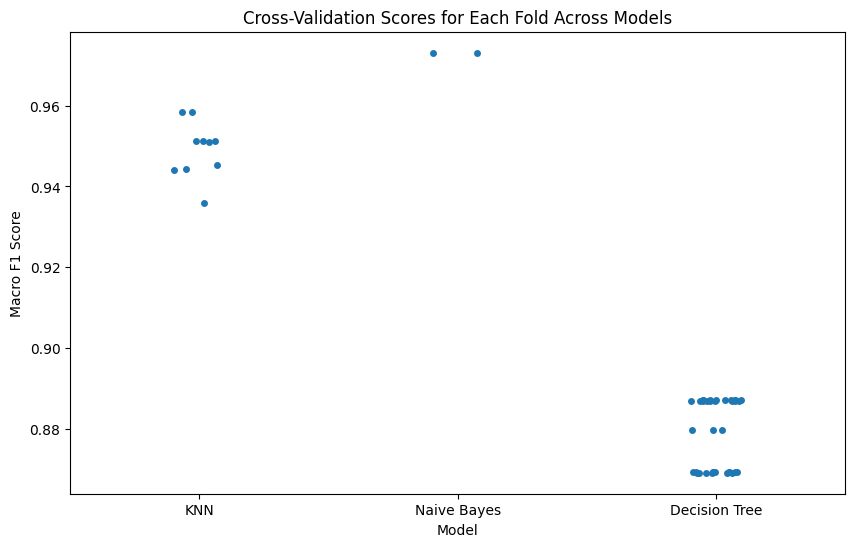

In [125]:
plt.figure(figsize=(10, 6))
sns.stripplot(x='Model', y='Macro F1 Score', data=cv_df, size=5)
plt.title('Cross-Validation Scores for Each Fold Across Models')
plt.show()


## Part 4 - Training 
Use the best combination of feature engineering, model (algorithm and hyperparameters) from the experiment part (part 3)

In [127]:

X_flow_train = train_data.drop(['target', 'total_phenols'], axis=1)
y_flow_train = train_data['target']

scaler = StandardScaler()

X_flow_train_scaled = scaler.fit_transform(X_flow_train)

model = GaussianNB()
model.fit(X_flow_train_scaled, y_flow_train)


GaussianNB()

## Part 5 - Apply on test and show model performance estimation

In [159]:
# Predict the target values
X_flow_test = test_data.drop(['target', 'total_phenols'], axis=1)
y_flow_test = test_data['target']

# Scale the test features
X_flow_test_scaled = scaler.transform(X_flow_test)

y_final_pred = model.predict(X_flow_test_scaled)

print("First 5 predictions:")
columns = ["prediction"]
columns.extend(X_flow_test.columns.tolist())

X_flow_test['prediction'] = y_final_pred

df = X_flow_test[columns]
df.head()


First 5 predictions:


,prediction,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,2,13.78,2.76,2.30,22.0,90.0,0.68,0.41,1.03,9.58,0.70,1.68,615.0
1,0,14.02,1.68,2.21,16.0,96.0,2.33,0.26,1.98,4.70,1.04,3.59,1035.0
2,2,13.17,5.19,2.32,22.0,93.0,0.63,0.61,1.55,7.90,0.60,1.48,725.0
3,1,11.03,1.51,2.20,21.5,85.0,2.17,0.52,2.01,1.90,1.71,2.87,407.0
4,2,13.40,3.91,2.48,23.0,102.0,0.75,0.43,1.41,7.30,0.70,1.56,750.0


Accuracy: 1.0


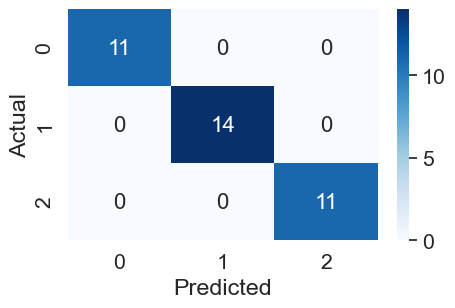

In [160]:

# accuracy
accuracy = accuracy_score(y_flow_test, y_final_pred)
print("Accuracy:", accuracy)

cm = confusion_matrix(y_flow_test, y_final_pred)

cm_df = pd.DataFrame(cm, columns=np.unique(y_flow_test), index=np.unique(y_flow_test))
cm_df.index.name = 'Actual'
cm_df.columns.name = 'Predicted'

# plot confusion matrix
plt.figure(figsize=(5, 3))
sns.set(font_scale=1.4)  # for label size
sns.heatmap(cm_df, cmap="Blues", annot=True, annot_kws={"size": 16})  # font size
plt.show()